In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df= pd.read_excel('after_EDA_final_dd.xlsx')

In [3]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS  ... DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0                   A  ...              0.0  -67.06  80.0  26.083333   
1                   A  ...              0.0   13.70  63.0  26.000000   
2                   A  ...              0.0  812.40  61.0  26.000000   
3                   A  ...              0.0  128.78  56.0  25.916667   
4                   A  ...              0.0 -100.63  60.0  25.916667   

  CUSTOMER_DEBIT_ACC CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                  3                       0.00                    0   
1                  0                       0.00                    0   
2                  1                   47205.46                    0   
3                  1                  170194.41                    0   
4                  1                   37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0              15.657527  3713.374413  
2                          0.0               5.319444     9.591558  
3                          0.0              49.102532    95.901806  
4                          0.0              18.551333    66.104647  

[5 rows x 39 columns]

In [4]:
df.shape

(24875, 39)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = df[df['CR_CARD_OVERDUE_STATUS'] == 'G']

In [8]:
df.shape

(22896, 39)

In [9]:
df_selected = df[['STR_CR_CARD_NUM', 'AVG_LIMIT_UTILIZATION','AGE', 'PAYMENT_AVG', 'CC_AGE','CUSTOMER_PROFITABILITY','CUSTOMER_DEBIT_ACC_BALANCE'
    
                ]]

In [10]:
df_selected.head()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233  80.0     8.008889  26.083333   
1  4157380000060029              15.657527  63.0  3713.374413  26.000000   
2  4157380000066018               5.319444  61.0     9.591558  26.000000   
3  4157380000072008              49.102532  56.0    95.901806  25.916667   
4  4157380000089002              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [11]:
df_selected.shape

(22896, 7)

In [12]:
# Assuming 'df_selected' is your DataFrame
df_new = df_selected.drop(columns=['STR_CR_CARD_NUM'],axis=1)
df_new.head()

AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0               8.782233  80.0     8.008889  26.083333   
1              15.657527  63.0  3713.374413  26.000000   
2               5.319444  61.0     9.591558  26.000000   
3              49.102532  56.0    95.901806  25.916667   
4              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [13]:
df_new.shape

(22896, 6)

In [14]:
df_new.dtypes

AVG_LIMIT_UTILIZATION         float64
AGE                           float64
PAYMENT_AVG                   float64
CC_AGE                        float64
CUSTOMER_PROFITABILITY        float64
CUSTOMER_DEBIT_ACC_BALANCE    float64
dtype: object

In [15]:
df_new.isna().sum()

AVG_LIMIT_UTILIZATION         0
AGE                           0
PAYMENT_AVG                   0
CC_AGE                        0
CUSTOMER_PROFITABILITY        0
CUSTOMER_DEBIT_ACC_BALANCE    0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(df_new))

In [17]:
X1 = np.asarray(X)

In [18]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import yellowbrick
import seaborn as sns
import warnings
import os
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from pywaffle import Waffle
from math import isnan
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap


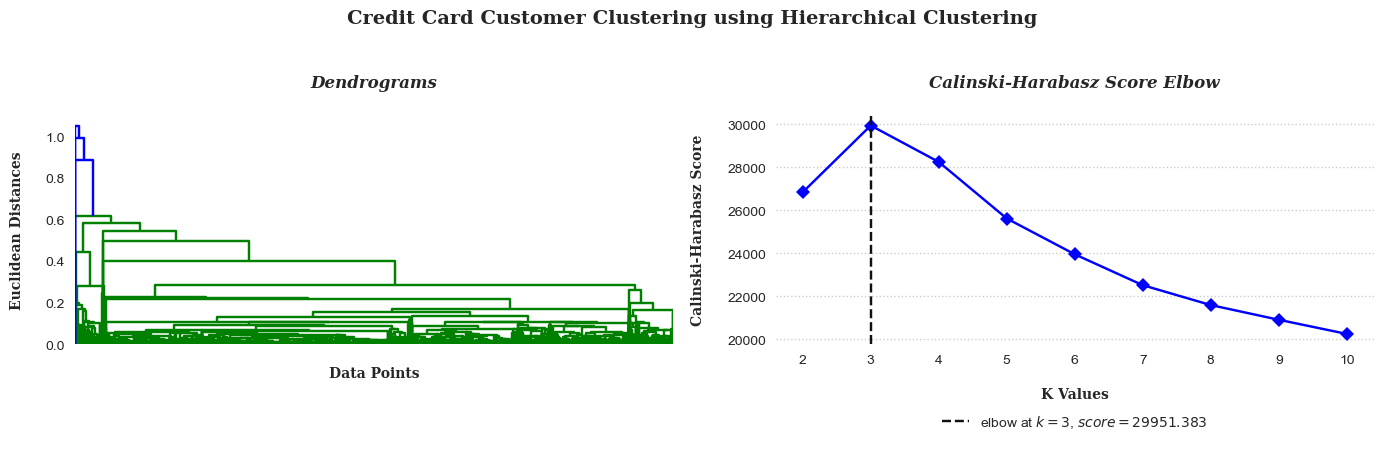

In [19]:
# --- Define Dendrogram ---
def agg_dendrogram():
    
    # --- Figure Settings ---
    color_palette=['blue', 'green', 'orange', 'red', 'yellow']
    set_palette(color_palette)
    text_style=dict(fontweight='bold', fontfamily='serif')
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    fig=plt.figure(figsize=(14, 5))
    
    # --- Dendrogram Plot ---
    ax1=fig.add_subplot(1, 2, 1)
    dend=shc.dendrogram(shc.linkage(X1, method='centroid', metric='euclidean'))
    plt.axhline(y=15, color='red', linestyle='--')
    plt.xlabel('\nData Points', fontsize=10, **text_style)
    plt.ylabel('Euclidean Distances\n', fontsize=10, **text_style)
    plt.annotate('Horizontal Cut Line', xy=(15000, 15), xytext=(1, 1), fontsize=10, bbox=bbox, **ann)
    plt.tick_params(labelbottom=False)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.tick_params(labelsize=10)
    plt.title('Dendrograms\n', **title)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2=fig.add_subplot(1, 2, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=10)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(10)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=10)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=10, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=10, **text_style)
    
    plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();